This script can only be executed, after the first Neuron cycleGAN has been trained and synthetic images have been created from the raw images. The path to the generated synthetic images is given below.

You can only execute this script, if you already have trained the live vs dead UDCT cycleGAN.

In [1]:
path_to_gen_syn_images = '../Models/live_dead_neuron_new_gen_B.h5'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py as h5

import random

import imageio as io

from skimage.filters import gaussian

/home/stephan/.local/lib/python2.7/site-packages/h5py-2.7.1-py2.7-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
f = h5.File(path_to_gen_syn_images,"r")

In [4]:
data   = (np.maximum(f['B/data'][:,:,:,1:2]/(2**16-1.),1./3)-1./3)/(2./3)
mask   = 1.-(data > 0)*1.
noise  = mask * np.random.randn(*data.shape)*0.05 + 0.1
data   = (np.maximum(np.minimum(data+noise,1.),0.)*(2**16-1)).astype(np.uint16)

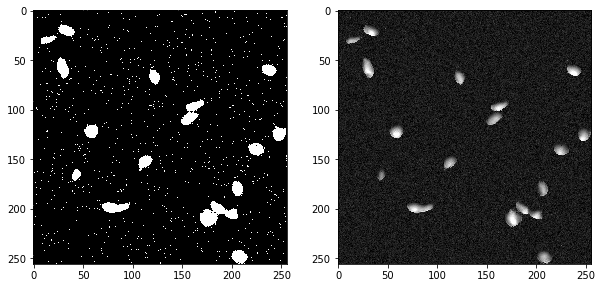

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow((np.maximum(f['B/data'][4,:,:,1]/(2**16-1.),1./3)-1./3)/(2./3)>0,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(data[4,:,:,0]/(2**16-1.),cmap='gray')
plt.show()

In [6]:
if not os.path.exists('../Data/Neuron_Col_Live/Raw/'):
    os.makedirs('../Data/Neuron_Col_Live/Raw/')
for i in range(data.shape[0]):
    io.imsave('../Data/Neuron_Col_Live/Raw/'+str(i).zfill(4)+'.png',data[i,:,:,0])